Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



---


**1. Fit a Naïve Bayes classifier built from scratch on Dataset 3(Diabetes.csv).**

---

Loading the dataset and printing the first few rows

In [ ]:
df_diabetes = pd.read_csv("/content/Diabetes.csv")

In [ ]:
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Description of the dataset

In [ ]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking Null Values

In [ ]:
print(df_diabetes.columns)
print("\nChecking if any Null Values\n")
print(df_diabetes.isnull().sum())

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Checking if any Null Values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
df_diabetes.nunique()

,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

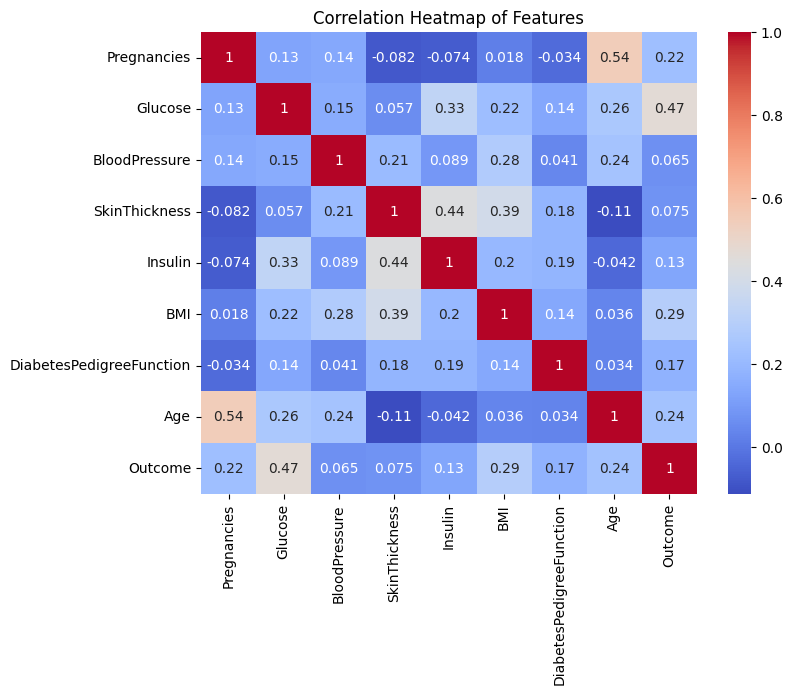

In [ ]:
correlation_matrix_diabetes = df_diabetes.corr()
print(correlation_matrix_diabetes)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_diabetes, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

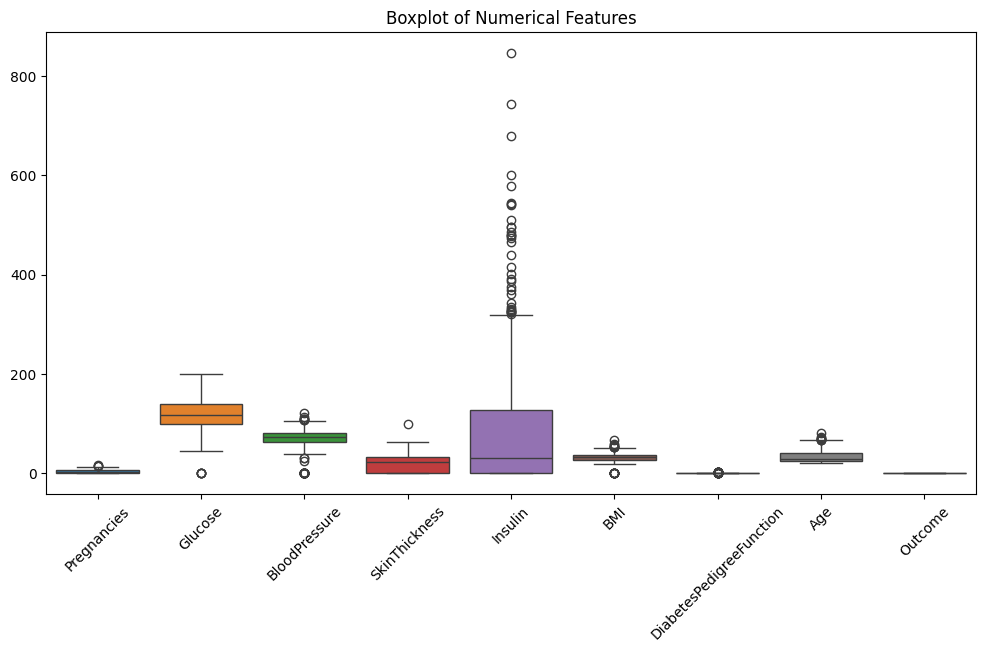

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_diabetes)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

need to remove the outliers

In [ ]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

    return filtered_df


cleaned_data_diabetes = remove_outliers_iqr(df_diabetes)

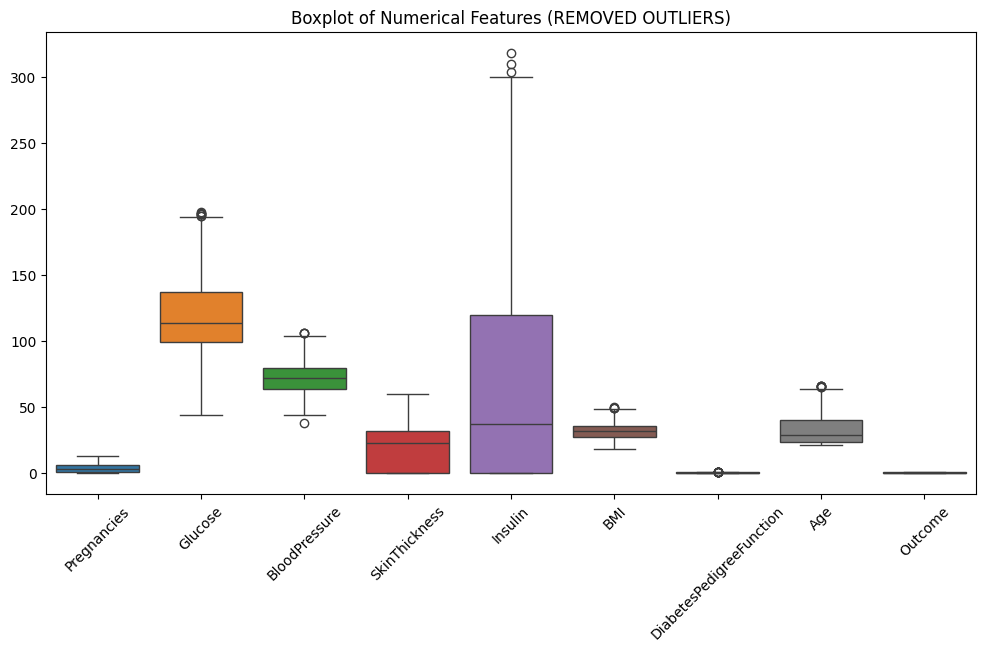

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data_diabetes)
plt.title("Boxplot of Numerical Features (REMOVED OUTLIERS)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior


def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)*2 / (2 * std*2 )))
    return p_x_given_y


def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred)

In [ ]:
print(cleaned_data_diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [ ]:
X_diabetes = cleaned_data_diabetes.drop(columns=['Outcome']).values
y_diabetes = cleaned_data_diabetes['Outcome'].values

X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=1)

In [ ]:
Y_pred = naive_bayes_gaussian(df_diabetes, X_test, 'Outcome')

In [ ]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy)

0.703125


**2. Using sklearn library fit a Naïve Bayes classifier on Dataset 1 and 2. Perform required pre-processing.**

**Dataset 1: Breastcancer.csv**

In [ ]:
df_breastcancer = pd.read_csv("/content/Breast_cancer_data.csv")

In [ ]:
print(df_breastcancer.columns)

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')


In [ ]:
df_breastcancer.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df_breastcancer.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [ ]:
df_breastcancer.isnull().sum()

,0
mean_radius,0
mean_texture,0
mean_perimeter,0
mean_area,0
mean_smoothness,0
diagnosis,0


                 mean_radius  mean_texture  mean_perimeter  mean_area  \
mean_radius         1.000000      0.323782        0.997855   0.987357   
mean_texture        0.323782      1.000000        0.329533   0.321086   
mean_perimeter      0.997855      0.329533        1.000000   0.986507   
mean_area           0.987357      0.321086        0.986507   1.000000   
mean_smoothness     0.170581     -0.023389        0.207278   0.177028   
diagnosis          -0.730029     -0.415185       -0.742636  -0.708984   

                 mean_smoothness  diagnosis  
mean_radius             0.170581  -0.730029  
mean_texture           -0.023389  -0.415185  
mean_perimeter          0.207278  -0.742636  
mean_area               0.177028  -0.708984  
mean_smoothness         1.000000  -0.358560  
diagnosis              -0.358560   1.000000  


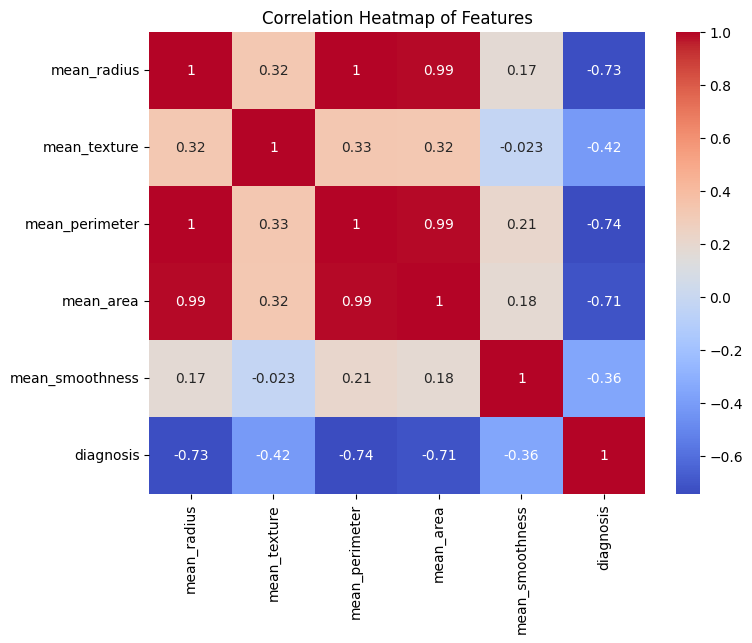

In [ ]:
corr_matrix_breastcancer = df_breastcancer.corr()
print(corr_matrix_breastcancer)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_breastcancer, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

In [ ]:
df_breastcancer.drop('mean_perimeter', axis=1, inplace=True)
df_breastcancer.drop('mean_area', axis=1, inplace=True)

In [ ]:
df_breastcancer.columns

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'diagnosis'], dtype='object')

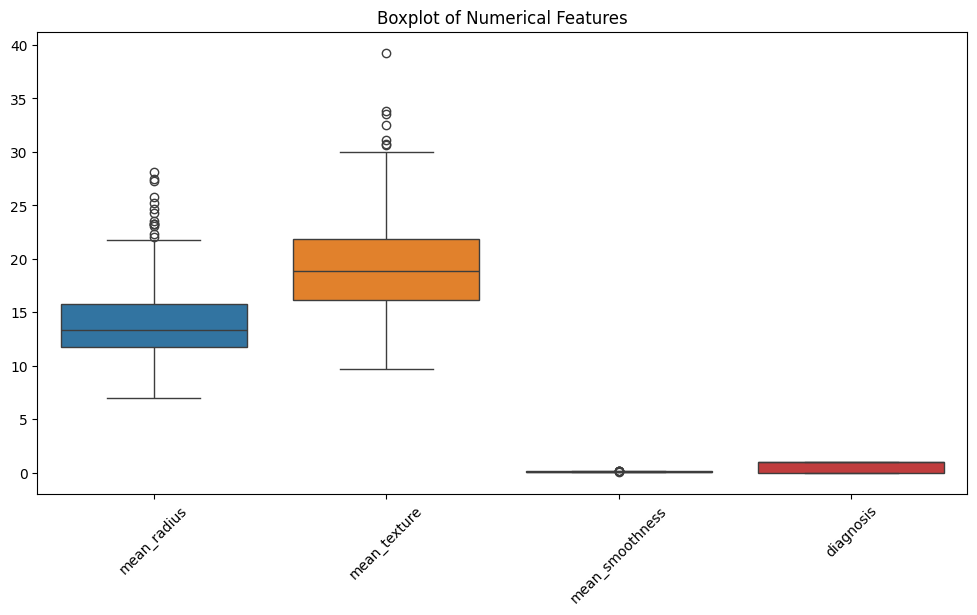

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_breastcancer)
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def remove_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]

    return filtered_df


cleaned_data_breastcancer = remove_outliers_iqr(df_breastcancer)

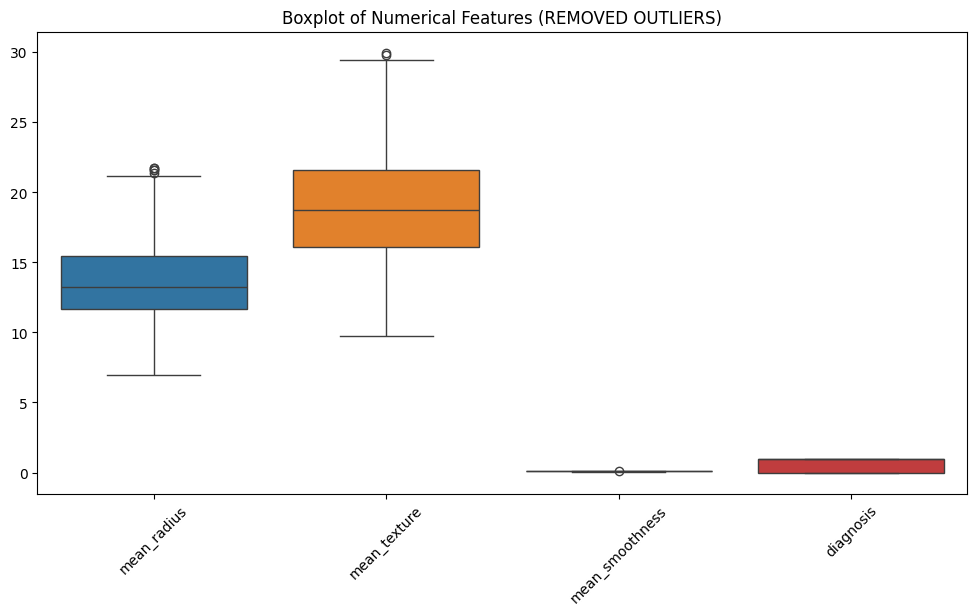

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data_breastcancer)
plt.title("Boxplot of Numerical Features (REMOVED OUTLIERS)")
plt.xticks(rotation=45)
plt.show()

In [ ]:
X_breastcancer = cleaned_data_breastcancer.iloc[:, :-1]
y_breastcancer = cleaned_data_breastcancer.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_breastcancer, y_breastcancer, test_size=0.2, random_state=42)

In [ ]:
classifier = GaussianNB()

classifier.fit(X_breastcancer, y_breastcancer)

GaussianNB()

In [ ]:
pred = classifier.predict(X_test)
print(accuracy_score(y_test, pred))

0.8990825688073395


**Dataset 3: Social_Network_Ads.csv**

In [ ]:
df_social = pd.read_csv("/content/Social_Network_Ads.csv")

In [ ]:
print(df_social.columns)

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [ ]:
df_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df_social.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df_social.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
label_encoder = LabelEncoder()
df_social['Gender'] = label_encoder.fit_transform(df_social['Gender'])

In [ ]:
df_social.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


Male: 1

Female: 0

                  User ID    Gender       Age  EstimatedSalary  Purchased
User ID          1.000000 -0.025249 -0.000721         0.071097   0.007120
Gender          -0.025249  1.000000 -0.073741        -0.060435  -0.042469
Age             -0.000721 -0.073741  1.000000         0.155238   0.622454
EstimatedSalary  0.071097 -0.060435  0.155238         1.000000   0.362083
Purchased        0.007120 -0.042469  0.622454         0.362083   1.000000


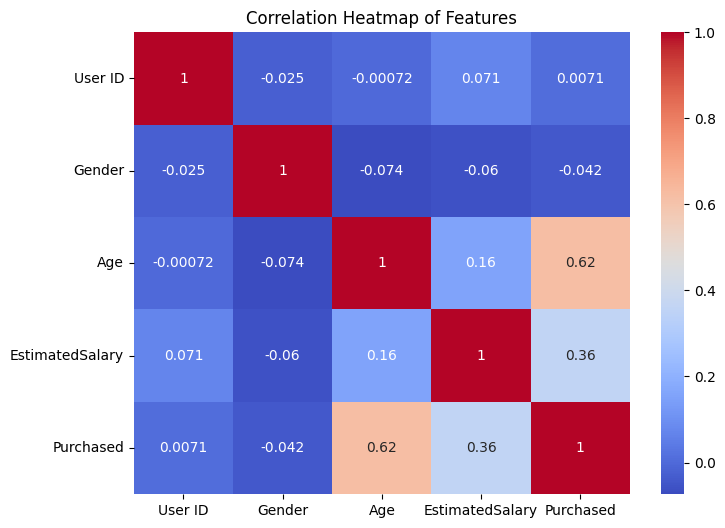

In [ ]:
corr_matrix_social = df_social.corr()
print(corr_matrix_social)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_social, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

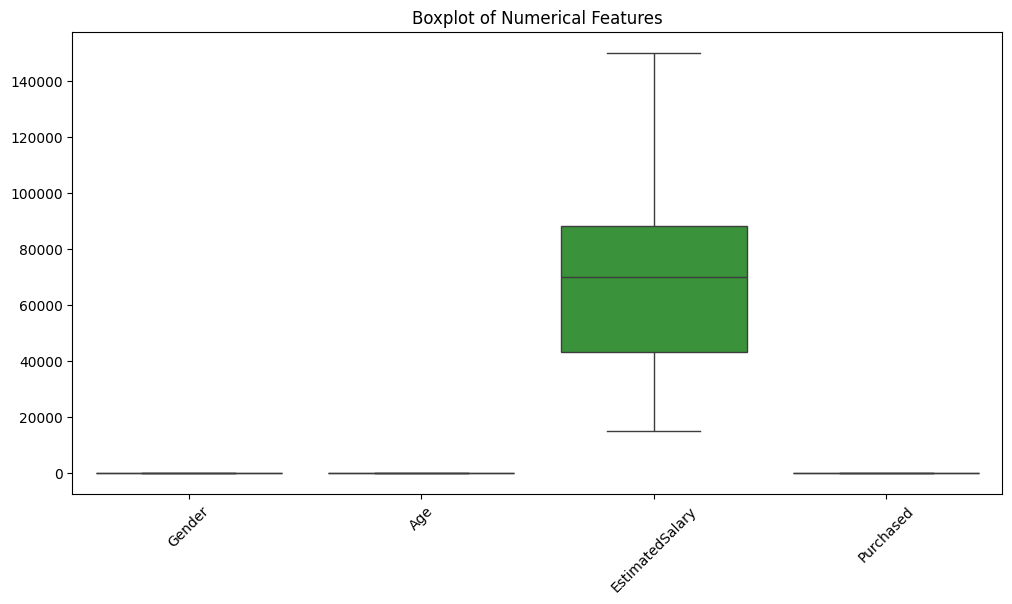

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_social.drop(columns=['User ID']))
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

<ipython-input-112-2339d293a1f3>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


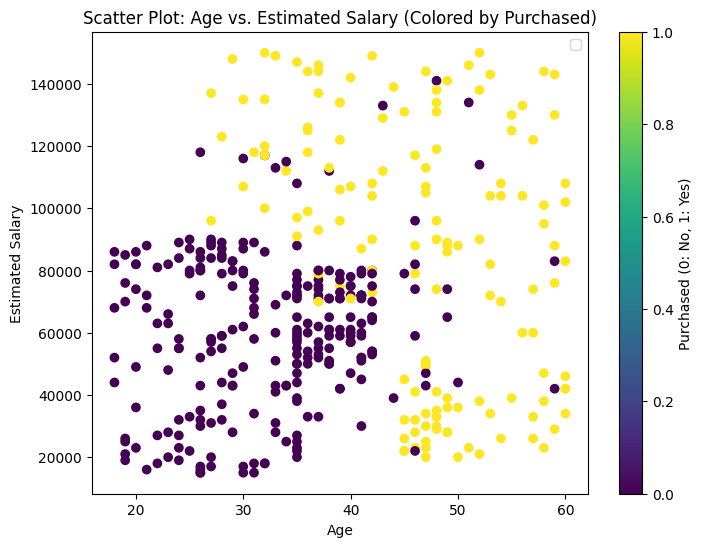

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df_social['Age'], df_social['EstimatedSalary'], c=df_social['Purchased'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Scatter Plot: Age vs. Estimated Salary (Colored by Purchased)')
plt.colorbar(label='Purchased (0: No, 1: Yes)')
plt.legend()
plt.show()

In [ ]:
df_social.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
feature_cols = ['Gender','Age','EstimatedSalary']
X_social = df_social[feature_cols]
y_social = df_social.Purchased

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_social, y_social, test_size=0.2, random_state=1)

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
pred = classifier.predict(X_test)
print(accuracy_score(Y_test, pred))

0.8625
